# 주가 예측
##20일치의 데이터를 통해 5일치 데이터 예측

In [1]:
!pip install finance-datareader

In [2]:
import FinanceDataReader as fd
from datetime import datetime as dt

company = '005930'  # 삼성전자
startdate = '1999-08-12'
enddate = dt.now()  # 오늘 날짜

stock = fd.DataReader(company, startdate, enddate)
stock

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-08-12,3800,3860,3730,3800,740069,NaN
1999-08-13,3699,3779,3610,3700,719845,-0.026316
1999-08-16,3680,3890,3640,3800,700220,0.027027
1999-08-17,3820,3870,3660,3680,759830,-0.031579
1999-08-18,3600,3760,3540,3680,695577,0.000000
...,...,...,...,...,...,...
2023-11-23,73000,73200,72200,72400,6775614,-0.005495
2023-11-24,72400,72600,71700,71700,6676685,-0.009669
2023-11-27,71500,72100,71100,71300,9113857,-0.005579


In [3]:
del stock['Volume']
del stock['Change']

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stock.iloc[:,0:4] = scaler.fit_transform(stock.iloc[:,0:4])

In [5]:
import pandas as pd
import numpy as np
from tensorflow import keras

standard_days = 20
forecast_days = 5

x = []
y = []

for i in range(len(stock) - standard_days - forecast_days + 1):
  x.append(stock.iloc[i:i+standard_days])
  y.append(stock.iloc[i+standard_days:i+standard_days + forecast_days])

x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(5976, 20, 4)
(5976, 5, 4)


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [7]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(4780, 20, 4) (4780, 5, 4)
(1196, 20, 4) (1196, 5, 4)


In [8]:
# y값 1차원 배열로 변환
y_train = y_train.reshape(-1, y_train.shape[1]*y_train.shape[2])
y_val = y_val.reshape(-1, y_val.shape[1]*y_val.shape[2])
print(y_train.shape, y_val.shape)

(4780, 20) (1196, 20)


In [9]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(LSTM(64, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dense(y_train.shape[1]))

model.compile(loss='mae', optimizer='adam', metrics='mae')

In [10]:
mc = ModelCheckpoint('stock3_samsung.h5', monitor='val_mae', mode='min', save_best_only=True)
ea = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)

In [11]:
history = model.fit(x_train, y_train, epochs=1000, callbacks=[mc, ea], validation_data=(x_val, y_val))

Epoch 1/1000
150/150 [==============================] - 15s 16ms/step - loss: 0.2375 - mae: 0.2375 - val_loss: 0.0750 - val_mae: 0.0750
Epoch 2/1000
 17/150 [==>...........................] - ETA: 0s - loss: 0.1201 - mae: 0.1201

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


150/150 [==============================] - 1s 8ms/step - loss: 0.1141 - mae: 0.1141 - val_loss: 0.0558 - val_mae: 0.0558
Epoch 3/1000
150/150 [==============================] - 1s 6ms/step - loss: 0.0976 - mae: 0.0976 - val_loss: 0.0663 - val_mae: 0.0663
Epoch 4/1000
150/150 [==============================] - 1s 7ms/step - loss: 0.0943 - mae: 0.0943 - val_loss: 0.0416 - val_mae: 0.0416
Epoch 5/1000
150/150 [==============================] - 1s 6ms/step - loss: 0.0882 - mae: 0.0882 - val_loss: 0.0375 - val_mae: 0.0375
Epoch 6/1000
150/150 [==============================] - 1s 6ms/step - loss: 0.0874 - mae: 0.0874 - val_loss: 0.0622 - val_mae: 0.0622
Epoch 7/1000
150/150 [==============================] - 1s 6ms/step - loss: 0.0846 - mae: 0.0846 - val_loss: 0.0697 - val_mae: 0.0697
Epoch 8/1000
150/150 [==============================] - 1s 6ms/step - loss: 0.0832 - mae: 0.0832 - val_loss: 0.0485 - val_mae: 0.0485
Epoch 9/1000
150/150 [==============================] - 1s 6ms/step - loss:

In [12]:
model = load_model('stock3_samsung.h5')
score = model.evaluate(x_val, y_val, verbose=0)
print(score[0])

0.03753343224525452


In [13]:
!pip install finance-datareader
import FinanceDataReader as fd
from datetime import date, time, timedelta

today=date.today()
days=timedelta(days=-30)
start_day=today+days

company = '005930'
current_stock = fd.DataReader(company, )

In [14]:
test_stock = stock.iloc[-20:,:]
test_stock

,Open,High,Low,Close
Date,,,,
2023-11-02,1.964226,1.936585,1.966133,1.951232
2023-11-03,1.950433,1.945710,1.970770,1.946630
2023-11-06,1.955031,1.977644,1.961495,2.006453
2023-11-07,1.991814,1.977644,1.993955,2.006453
2023-11-08,2.023999,2.000454,1.980044,1.960435
2023-11-09,1.959629,1.973082,1.975407,1.978842
2023-11-10,1.964226,1.959396,1.970770,1.988046
2023-11-13,2.023999,1.995892,2.007867,1.983444
2023-11-14,2.010205,1.986768,2.021778,2.001851


In [15]:
predict_stock = model.predict(np.array([test_stock]))
print(predict_stock)
print(predict_stock.shape)

1/1 [==============================] - 1s 563ms/step
[[2.036518  2.0296419 1.9695249 1.9865743 1.96737   1.9654508 1.9942272
  1.9351764 1.9931043 1.9812429 1.9933913 1.9469658 2.0324533 1.9852127
  1.9901675 2.0386267 2.0156446 2.0435038 1.9950415 2.0236454]]
(1, 20)


In [16]:
reshape_predict_stock = predict_stock.reshape((forecast_days, -1))
reshape_predict_stock

array([[2.036518 , 2.0296419, 1.9695249, 1.9865743],
       [1.96737  , 1.9654508, 1.9942272, 1.9351764],
       [1.9931043, 1.9812429, 1.9933913, 1.9469658],
       [2.0324533, 1.9852127, 1.9901675, 2.0386267],
       [2.0156446, 2.0435038, 1.9950415, 2.0236454]], dtype=float32)

In [17]:
predict = scaler.inverse_transform(reshape_predict_stock)
predict

array([[71572.29 , 72039.805, 69473.16 , 70468.03 ],
       [70068.37 , 70632.73 , 70005.86 , 69351.11 ],
       [70628.07 , 70978.9  , 69987.836, 69607.3  ],
       [71483.88 , 71065.914, 69918.31 , 71599.17 ],
       [71118.305, 72343.664, 70023.42 , 71273.62 ]], dtype=float32)

In [18]:
predict_df = pd.DataFrame(predict,
                          columns=['Open', 'High', 'Low', 'Close'])
predict_df = predict_df.applymap(lambda x:int(x))
predict_df

,Open,High,Low,Close
0,71572,72039,69473,70468
1,70068,70632,70005,69351
2,70628,70978,69987,69607
3,71483,71065,69918,71599
4,71118,72343,70023,71273


In [19]:
last_date = stock.index[-1]
date_range = pd.date_range(start = last_date + pd.Timedelta(days=1),
                           periods = forecast_days, freq='D')
predict_df.index = date_range
predict_df

,Open,High,Low,Close
2023-11-30,71572,72039,69473,70468
2023-12-01,70068,70632,70005,69351
2023-12-02,70628,70978,69987,69607
2023-12-03,71483,71065,69918,71599
2023-12-04,71118,72343,70023,71273


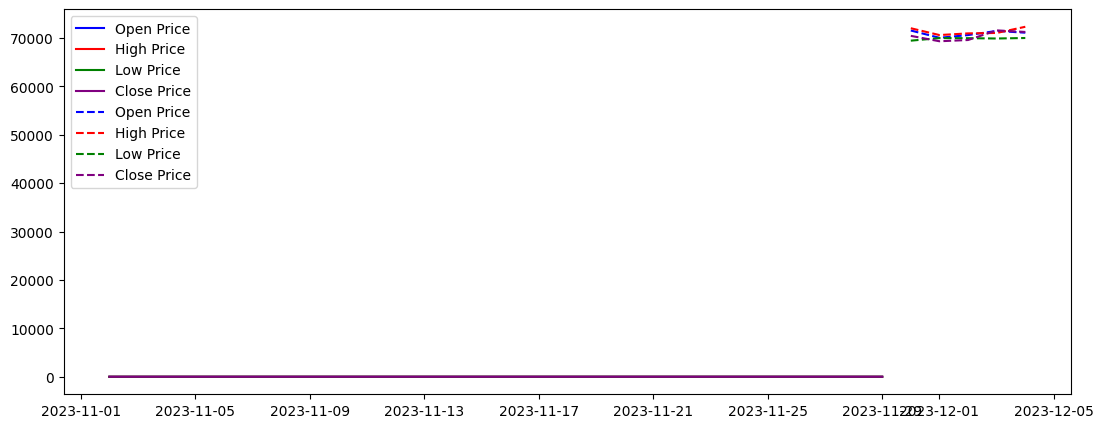

In [20]:
import matplotlib.pyplot as plt
cols = ['Open', 'High', 'Low', 'Close']

plt.figure(figsize=(13, 5))
recent_df = test_stock

plt.plot(recent_df['Open'], label='Open Price', color='blue')
plt.plot(recent_df['High'], label='High Price', color='red')
plt.plot(recent_df['Low'], label='Low Price', color='green')
plt.plot(recent_df['Close'], label='Close Price', color='purple')

plt.plot(predict_df['Open'], label='Open Price', linestyle='--', color='blue')
plt.plot(predict_df['High'], label='High Price', linestyle='--',color='red')
plt.plot(predict_df['Low'], label='Low Price', linestyle='--',color='green')
plt.plot(predict_df['Close'], label='Close Price', linestyle='--',color='purple')

plt.legend()
plt.show()